# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_min"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | palmares do sul
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | cayenne
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | khonuu
City not found. Skipping...
Processing Record 11 of Set 1 | mae hong son
Processing Record 12 of Set 1 | qandahar
City not found. Skipping...
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | plettenberg bay
Processing Record 16 of Set 1 | sampit
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | rajapur
Processing Record 20 of Set 1 | chapais
Processing Record 21 of Set 1

Processing Record 34 of Set 4 | tasiilaq
Processing Record 35 of Set 4 | sadovyy
Processing Record 36 of Set 4 | saint-philippe
Processing Record 37 of Set 4 | balkanabat
Processing Record 38 of Set 4 | raha
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | lasa
Processing Record 41 of Set 4 | sao gabriel da cachoeira
Processing Record 42 of Set 4 | moose factory
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | tankhoy
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | yantal
Processing Record 47 of Set 4 | furstenwalde
Processing Record 48 of Set 4 | caninde
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | husavik
Processing Record 1 of Set 5 | pak phanang
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | sataua
City not found. Skipping...
Processing Record 4 of Set 5 | san carlos de bariloche
Processing Record 5 of Set 5 | baykit
Processing Record 6 of Set 5 | pontes e lacerda
Proc

Processing Record 18 of Set 8 | valdosta
Processing Record 19 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 8 | manokwari
Processing Record 21 of Set 8 | maturin
Processing Record 22 of Set 8 | baglung
Processing Record 23 of Set 8 | yerbogachen
Processing Record 24 of Set 8 | gazanjyk
Processing Record 25 of Set 8 | homer
Processing Record 26 of Set 8 | carutapera
Processing Record 27 of Set 8 | la baule-escoublac
Processing Record 28 of Set 8 | naduvattam
Processing Record 29 of Set 8 | richards bay
Processing Record 30 of Set 8 | druskininkai
Processing Record 31 of Set 8 | nelson bay
Processing Record 32 of Set 8 | kerman
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | padre bernardo
Processing Record 35 of Set 8 | iquitos
Processing Record 36 of Set 8 | lieksa
Processing Record 37 of Set 8 | jinchang
Processing Record 38 of Set 8 | duverge
Processing Record 39 of Set 8 | ouesso
Processing Record 40 of Set 8 | harrisonburg
Proce

Processing Record 6 of Set 12 | escanaba
Processing Record 7 of Set 12 | esperance
Processing Record 8 of Set 12 | maumere
Processing Record 9 of Set 12 | shelburne
Processing Record 10 of Set 12 | avera
Processing Record 11 of Set 12 | manuk mangkaw
Processing Record 12 of Set 12 | debar
Processing Record 13 of Set 12 | souris
Processing Record 14 of Set 12 | kano
Processing Record 15 of Set 12 | phonhong
Processing Record 16 of Set 12 | gushi
Processing Record 17 of Set 12 | soyo
Processing Record 18 of Set 12 | yaan
Processing Record 19 of Set 12 | okaihau
Processing Record 20 of Set 12 | talcahuano
Processing Record 21 of Set 12 | kalemie
Processing Record 22 of Set 12 | dire
Processing Record 23 of Set 12 | santa ana
Processing Record 24 of Set 12 | iracoubo
Processing Record 25 of Set 12 | krasnoarmeysk
Processing Record 26 of Set 12 | elko
Processing Record 27 of Set 12 | hirado
Processing Record 28 of Set 12 | sri aman
Processing Record 29 of Set 12 | grand gaube
Processing Rec

In [27]:
type(city_data)

list

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
    

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,-30.35,-30.35,100,1.64,RU,1675829721
1,jamestown,42.0970,-79.2353,2.79,1.64,100,4.12,US,1675829496
2,punta arenas,-53.1500,-70.9167,13.06,12.84,0,6.69,CL,1675829607
3,hermanus,-34.4187,19.2345,18.78,18.78,0,5.59,ZA,1675829749
4,palmares do sul,-30.2578,-50.5097,23.50,23.50,0,5.41,BR,1675830054


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-30.35,-30.35,100,1.64,RU,1675829721
1,jamestown,42.0970,-79.2353,2.79,1.64,100,4.12,US,1675829496
2,punta arenas,-53.1500,-70.9167,13.06,12.84,0,6.69,CL,1675829607
3,hermanus,-34.4187,19.2345,18.78,18.78,0,5.59,ZA,1675829749
4,palmares do sul,-30.2578,-50.5097,23.50,23.50,0,5.41,BR,1675830054


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

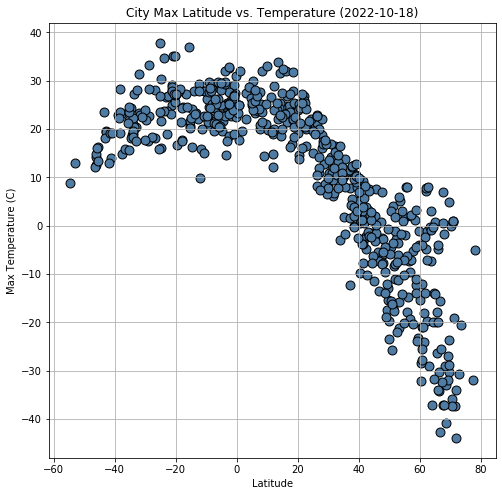

In [78]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

temp_lat = city_data_df.plot.scatter(x ="Lat", y="Max Temp", color = "#4f7ca4", grid = True,
                                     figsize = (8,8), edgecolors ="black", linewidth = 1, s =80)

# Incorporate the other graph properties
# YOUR CODE HERE
temp_lat.set_ylabel("Max Temperature (C)")
temp_lat.set_xlabel("Latitude")
temp_lat.set_title("City Max Latitude vs. Temperature (2022-10-18)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

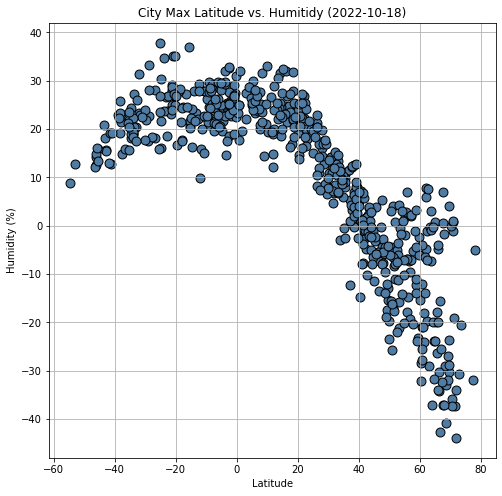

In [85]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
lat_hum = city_data_df.plot.scatter(x ="Lat", y="Humidity", color = "#4f7ca4", grid = True,
                                     figsize = (8,8), edgecolors ="black", linewidth = 1, s =80)

# Incorporate the other graph properties
# YOUR CODE HERE
lat_hum.set_ylabel("Humidity (%)")
lat_hum.set_xlabel("Latitude")
lat_hum.set_title("City Max Latitude vs. Humitidy (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

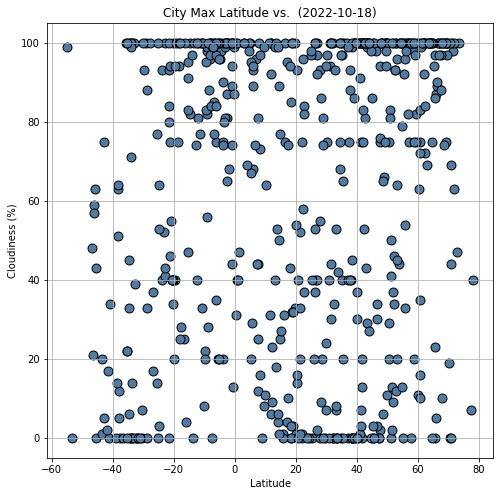

In [86]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
lat_cloud = city_data_df.plot.scatter(x ="Lat", y="Cloudiness", color = "#4f7ca4", grid = True,
                                     figsize = (8,8), edgecolors ="black", linewidth = 1, s =80)


# Incorporate the other graph properties
# YOUR CODE HERE
lat_cloud.set_ylabel("Cloudiness (%)")
lat_cloud.set_xlabel("Latitude")
lat_cloud.set_title("City Max Latitude vs.  (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

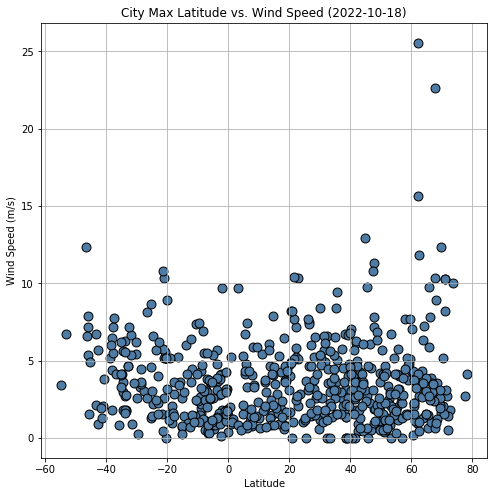

In [88]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
lat_wind = city_data_df.plot.scatter(x ="Lat", y="Wind Speed", color = "#4f7ca4", grid = True,
                                     figsize = (8,8), edgecolors ="black", linewidth = 1, s =80)


# Incorporate the other graph properties
# YOUR CODE HERE
lat_wind.set_ylabel("Wind Speed (m/s)")
lat_wind.set_xlabel("Latitude")
lat_wind.set_title("City Max Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


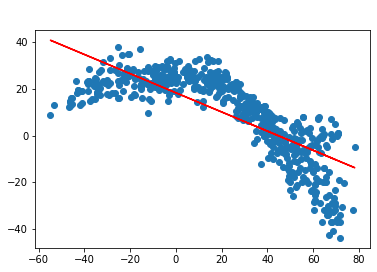

In [104]:
#Lat Vs. Temp
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.ylabel('Max Temperature (C)')
# plt.xlabel("Latitude")
# plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.show()

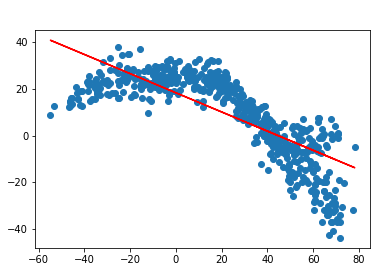

In [106]:
#Lat Vs. Humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.ylabel('Max Temperature (C)')
# plt.xlabel("Latitude")
# plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.show()

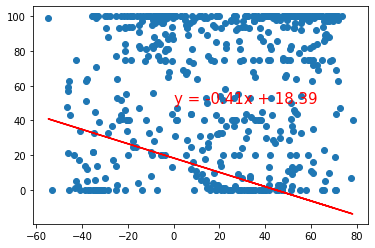

In [108]:
#Lat Vs. Cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.ylabel('Max Temperature (C)')
# plt.xlabel("Latitude")
# plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.show()

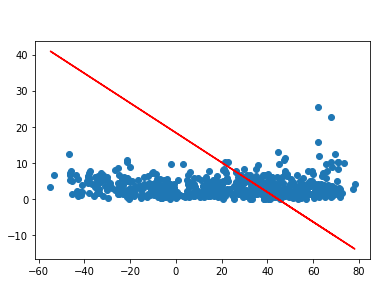

In [109]:
#Lat Vs. Wind Speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.ylabel('Max Temperature (C)')
# plt.xlabel("Latitude")
# plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.show()

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-30.35,-30.35,100,1.64,RU,1675829721
1,jamestown,42.0970,-79.2353,2.79,1.64,100,4.12,US,1675829496
6,cayenne,4.9333,-52.3333,25.02,25.02,100,1.54,GF,1675830054
8,mae hong son,19.3003,97.9685,24.08,24.08,3,1.54,TH,1675830055
9,berlevag,70.8578,29.0864,1.00,-1.11,44,10.29,NO,1675829866


In [116]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,13.06,12.84,0,6.69,CL,1675829607
3,hermanus,-34.4187,19.2345,18.78,18.78,0,5.59,ZA,1675829749
4,palmares do sul,-30.2578,-50.5097,23.50,23.50,0,5.41,BR,1675830054
5,busselton,-33.6500,115.3333,27.30,27.30,0,1.74,AU,1675829977
7,carnarvon,-24.8667,113.6333,30.36,30.36,3,6.56,AU,1675829820


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7548527712978897


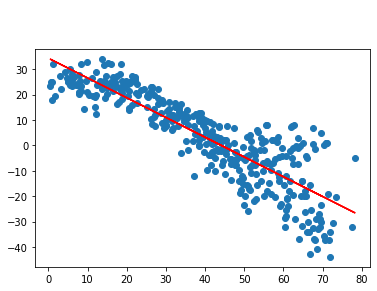

In [120]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.17633468197869748


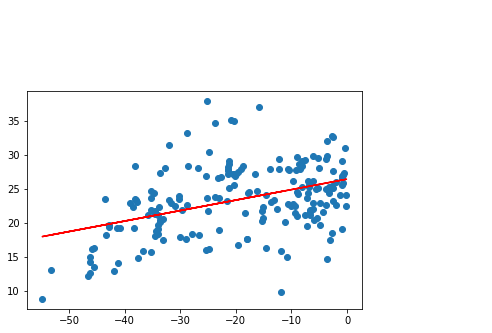

In [121]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The linear relationship between latitude and temperature shows a postive relationship as you go from the southern hemisphere to the equator as temperatures rise and a negative relationship from the northern hemisphere to the equator as temperatures also rise as you get to the equator. These graphs show that the equator has a higher temperature than the two hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.7677055729679445


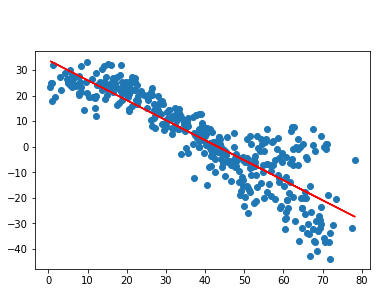

In [123]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.20672374255304474


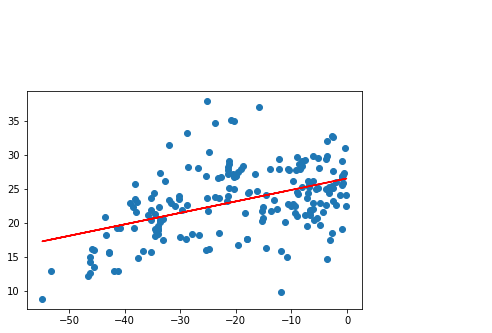

In [124]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

Looking at the linear relationship for the northern hemisphere between latitude and humidty, you can see a negative relationship. As latitude decreases, the humidity also decreases. The linear relationship for the southern hemisphere is a postive one as latitude increases, the humidity also increases. These relationship show that as you get closer to the equator the humidity also increases. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04043415579360945


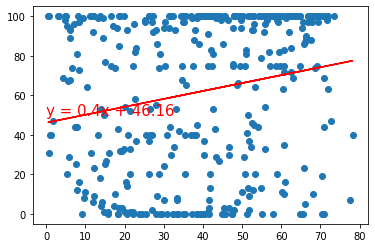

In [125]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.24094466971193262


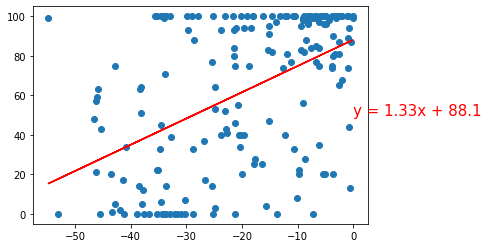

In [126]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The linear relationship for both southern and northern hemipshere is a positive one. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008645683916359156


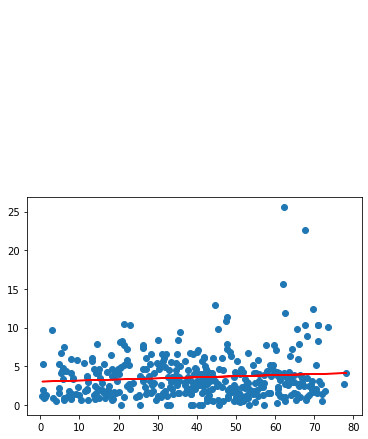

In [127]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.1128507854854402


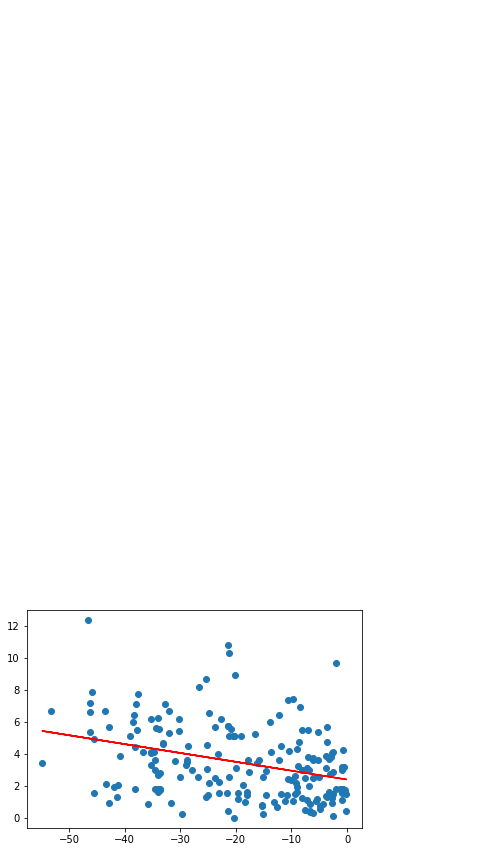

In [128]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.set_xlabel('Latitude')
# plt.set_ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The linear relationship for northern and sourthern hemisphere between wind speed and latitude does not exist